In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
data = pd.read_csv("./Salary_Data.csv")
print(len(data))
data.head(10)

30


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


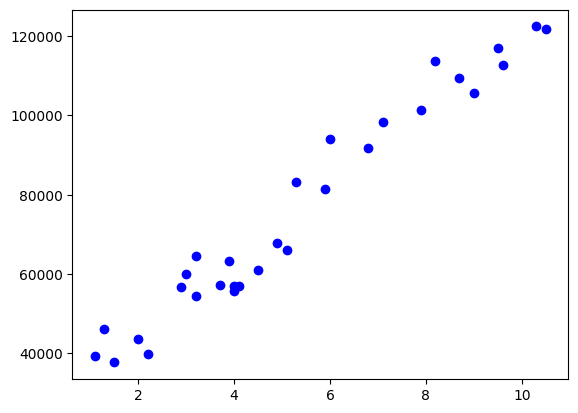

In [19]:
##Plot the data
plt.scatter(data["YearsExperience"], data["Salary"], color='blue', label='data')
plt.show()

Length of train data is 21
Length of test data is 9


/tmp/ipykernel_2610/3160665013.py:35: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.fill_between(X_train.ravel(), (y_pred_train - confidence_interval_1sd).flatten(), (y_pred_train + confidence_interval_1sd).flatten(),
/tmp/ipykernel_2610/3160665013.py:37: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.fill_between(X_train.ravel(), (y_pred_train - confidence_interval_2sd).flatten(), (y_pred_train + confidence_interval_2sd).flatten(),


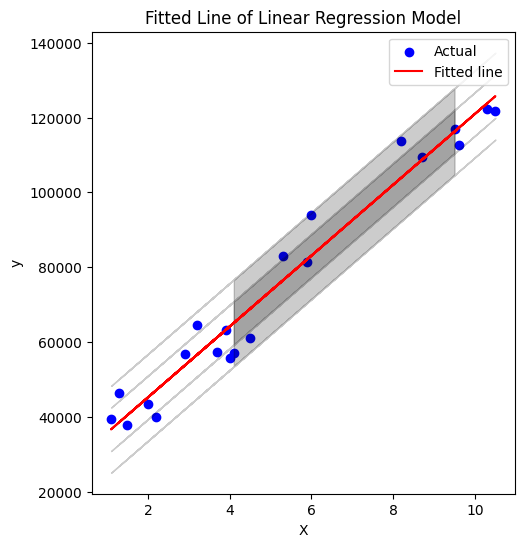

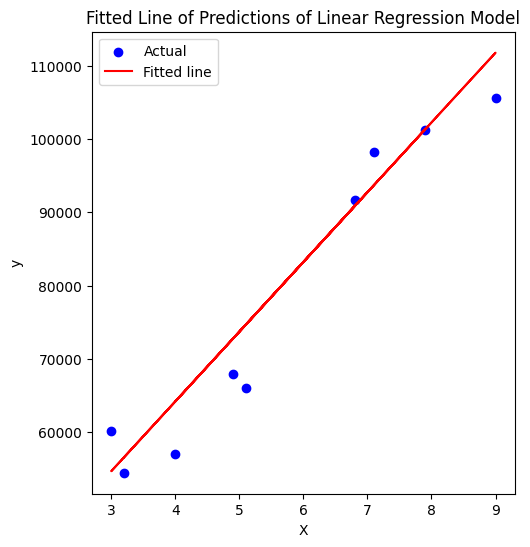

In [98]:
##Prepare data for training and testing
X = data["YearsExperience"]
y =  data["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(f"Length of train data is {len(X_train)}")
print(f"Length of test data is {len(X_test)}")

#*********** Train Data **************************
##Train the model and plot the training output
model = LinearRegression().fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
y_pred_train = model.predict(X_train.values.reshape(-1,1))
residuals = y_train.values.reshape(-1,1) - y_pred_train
std_residuals = np.std(residuals)

# Calculate confidence intervals for 1 and 2 standard deviations
confidence_interval_1sd = 1.0 * std_residuals
confidence_interval_2sd = 2.0 * std_residuals


plt.figure(figsize=(12, 6)) 

# Plot the data points
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')

# Plot the fitted line
plt.plot(X_train, y_pred_train, color='red', label='Fitted line')

plt.title('Fitted Line of Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


plt.fill_between(X_train.ravel(), (y_pred_train - confidence_interval_1sd).flatten(), (y_pred_train + confidence_interval_1sd).flatten(), 
                 color='black', alpha=0.2, label='1 SD')
plt.fill_between(X_train.ravel(), (y_pred_train - confidence_interval_2sd).flatten(), (y_pred_train + confidence_interval_2sd).flatten(), 
                 color='black', alpha=0.2, label='2 SD')
plt.show()

#*********** Test Data **************************
plt.figure(figsize=(12, 6)) 
y_pred_test = reg.predict(X_test.values.reshape(-1,1)) 
# Plot the test output
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the fitted line
plt.plot(X_test, y_pred_test, color='red', label='Fitted line')

plt.title('Fitted Line of Predictions of Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [73]:
def calculateSumOfSquareError(y_actual, y_pred):
    square_error = (y_pred - y_actual) ** 2
    sum_square_error = sum(square_error)
    return( sum_square_error/(len(y_pred)) )

In [80]:
mse_result = calculateSumOfSquareError( y_train.values.reshape(-1,1), y_pred_train)
print(f"Mean Sum of Squared error of training data model fit is {result} using custom function")
mse = mean_squared_error(y_train.values.reshape(-1,1), y_pred_train)
print(f"Mean Sum of Squared error of training data model fit is {mse} using built-in function")

Mean Sum of Squared error of training data model fit is [26641677.33278348] using custom function
Mean Sum of Squared error of training data model fit is 26350317.280996125 using built-in function


In [94]:
print((y_pred_train - confidence_interval_1sd).flatten())

[115939.70086907 109480.98065379 103944.93475497  32899.01238687
  62424.59051387  31053.66375393  67960.63641269  56888.54461506
  83646.09979266  58733.893248    96563.54022322 101176.91180557
  76264.70526091  69805.98504563  57811.21893153  75342.03094444
  57811.21893153  55043.19598212  50429.82439978  66115.28777975
  48584.47576684]
